### Load Libraries
We start by importing the core libraries for data analysis and visualization. Pandas will be used for handling data, Numpy will be used for calculation methods, and Matplotlib/Seaborn will support charting.

In [710]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.anova as sms
from sklearn.metrics import mean_squared_error, mean_absolute_error

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

## Load the data

Load the EdGap data set

In [711]:
edgap = pd.read_excel(
  '../data/EdGap_data.xlsx', 
  dtype={'NCESSCH School ID': object})

/Users/congho/SU_Homework/data-5100-foundations-of-data-science/education/venv/lib/python3.13/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [712]:
school_information = pd.read_csv(
  '../data/ccd_sch_029_1617_w_1a_11212017.csv', encoding='unicode_escape'
)

/var/folders/hm/_316rgmd4v763bh_ttk3pzkr0000gn/T/ipykernel_85544/3687044859.py:1: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_information = pd.read_csv(


### Explore the contents of the data sets

#### Start by looking at the head of each data frame

This will let us see the names of the columns and a few example values for each column. We can also check whether the data is in tidy format.

In [713]:
edgap.head()

,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [714]:
pd.set_option('display.max_columns', None)
school_information.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,MSTREET1,MSTREET2,MSTREET3,MCITY,MSTATE,MZIP,MZIP4,LSTREET1,LSTREET2,LSTREET3,LCITY,LSTATE,LZIP,LZIP4,PHONE,WEBSITE,SY_STATUS,SY_STATUS_TEXT,UPDATED_STATUS,UPDATED_STATUS_TEXT,EFFECTIVE_DATE,SCH_TYPE_TEXT,SCH_TYPE,RECON_STATUS,OUT_OF_STATE_FLAG,CHARTER_TEXT,CHARTAUTH1,CHARTAUTHN1,CHARTAUTH2,CHARTAUTHN2,NOGRADES,G_PK_OFFERED,G_KG_OFFERED,G_1_OFFERED,G_2_OFFERED,G_3_OFFERED,G_4_OFFERED,G_5_OFFERED,G_6_OFFERED,G_7_OFFERED,G_8_OFFERED,G_9_OFFERED,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0020,1.000020e+10,100277.0,P O Box 9486,NaN,NaN,Birmingham,AL,35220,NaN,1000 Industrial School Road,NaN,NaN,Birmingham,AL,35220,NaN,(205)680-8574,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0050,1.000020e+10,101667.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,1601 County Rd. 57,NaN,NaN,Prattville,AL,36067,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0060,1.000020e+10,101670.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,2109 Bashi Rd Bldg 509,NaN,NaN,Thomasville,AL,36784,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0030,1.000020e+10,101705.0,P O Box 66,NaN,NaN,Mount Meigs,AL,36057,NaN,1000 Industrial School Road,NaN,NaN,Mount Meigs,AL,36057,NaN,(334)215-6039,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0040,1.000020e+10,101706.0,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,(205)838-4981,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported


Use the info method to check the data types, size of the data frame, and numbers of missing values

In [715]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


In [716]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

Based on the information of these dataset, we have some overall information that:
1. The school information data set is much larger then the EdGap data set. Clearly the EdGap data set does not include all schools.
2. There are missing value in EdGap data set.
3. Each data set is in a tidy, or long format.
4. The data types for the variables of interest look correct, but the school information identifier is an `object` in the EdGap data set and a `float64` in the school information data set.

Next we want to perform quick exploratory data analysis to determine whether the data are sufficient to answer our question. If the data are not sufficient, we do not want to waste time doing anything that will not be productive.

Make a pair plot to explore relationships between the variables and regression lines and format the pair plot

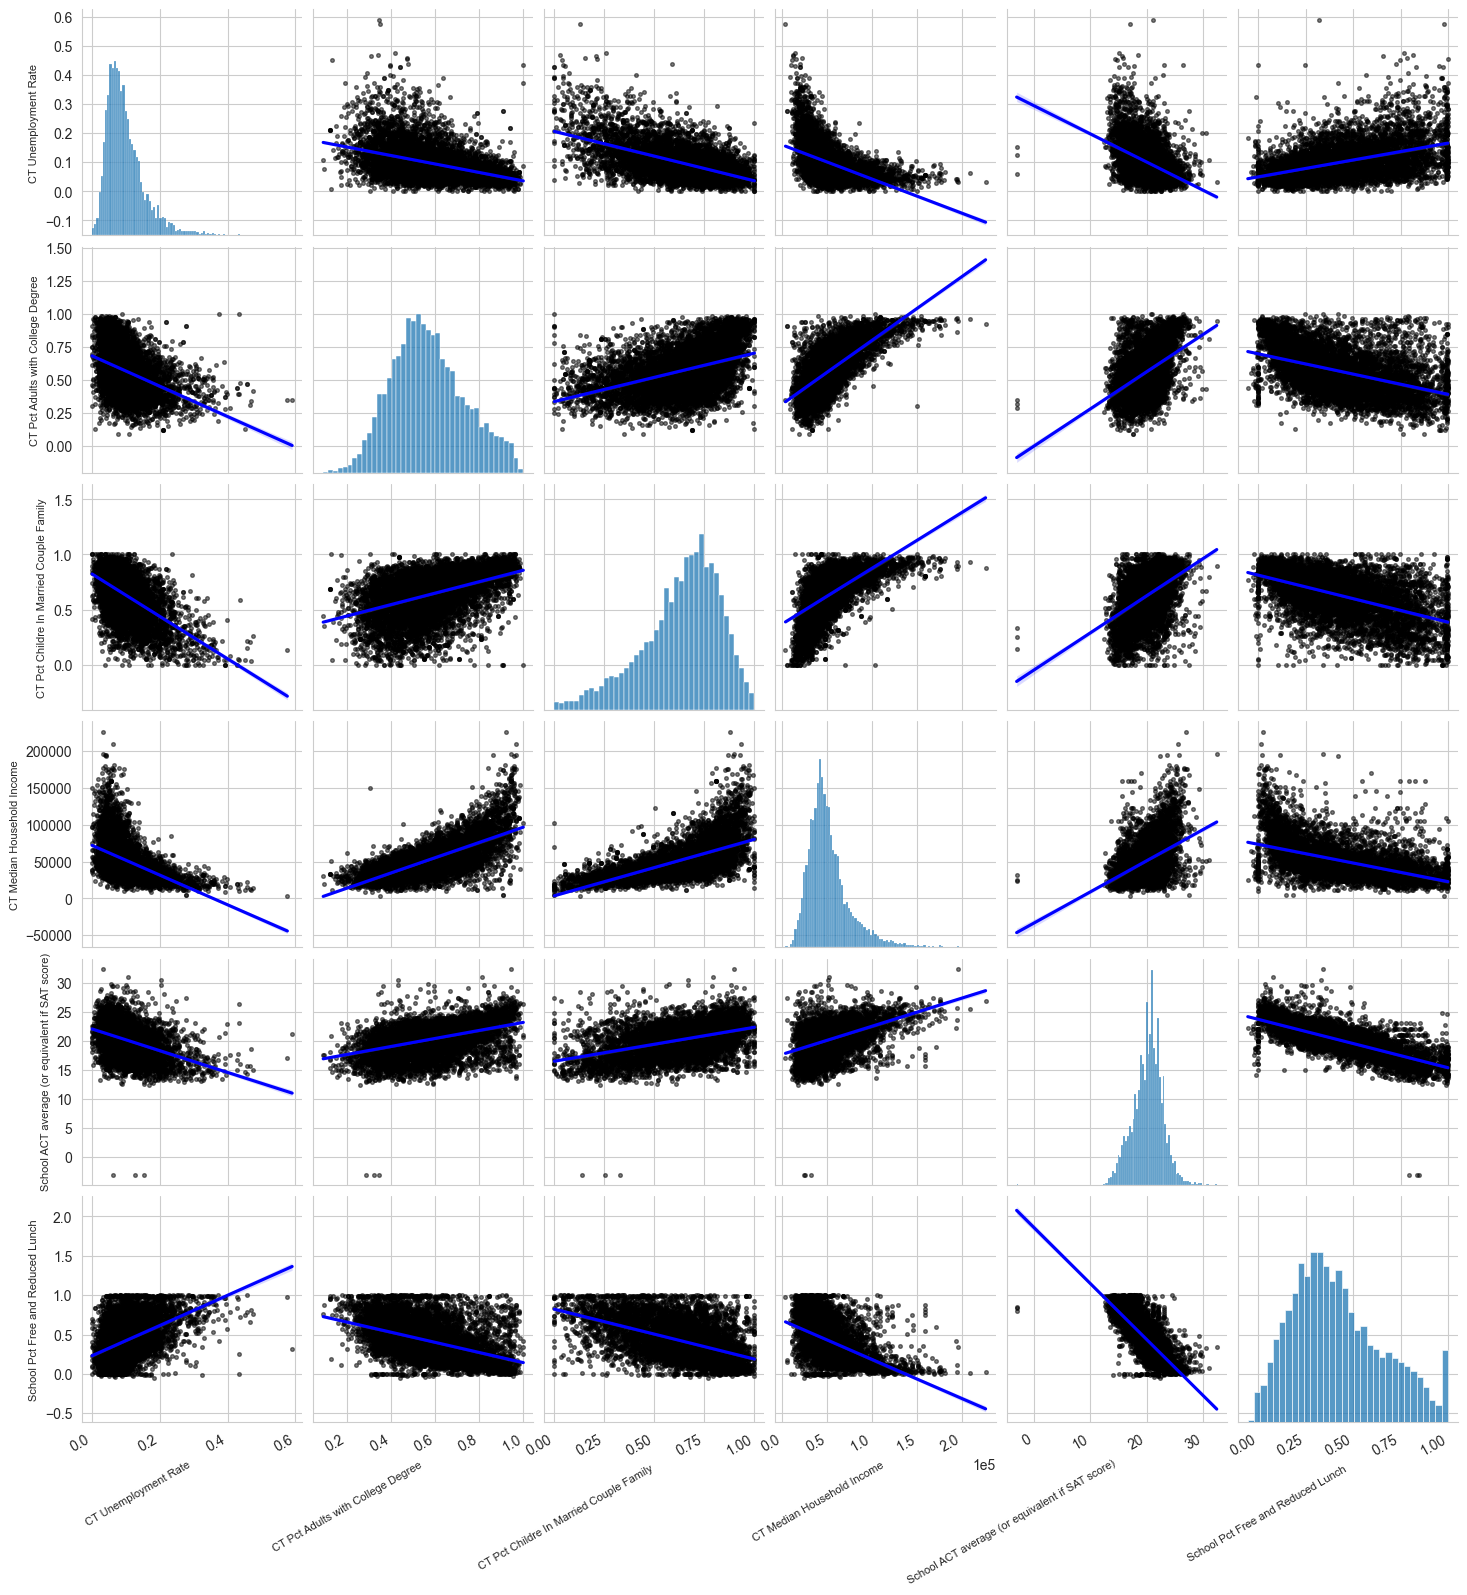

In [717]:
fig = sns.pairplot(
  edgap.drop(columns="NCESSCH School ID"),
  kind="reg",
  plot_kws={
    "line_kws": {"color": "blue"},
    "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
  }
)

for ax in fig.axes.flat:
  if ax.get_xlabel() == 'CT Median Household Income':
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # Apply scientific notation
  ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right') # X-axis label size and rotation
  ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size
  
  # Rotate x-axis tick labels
  plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
  
plt.show()

Plot a single row

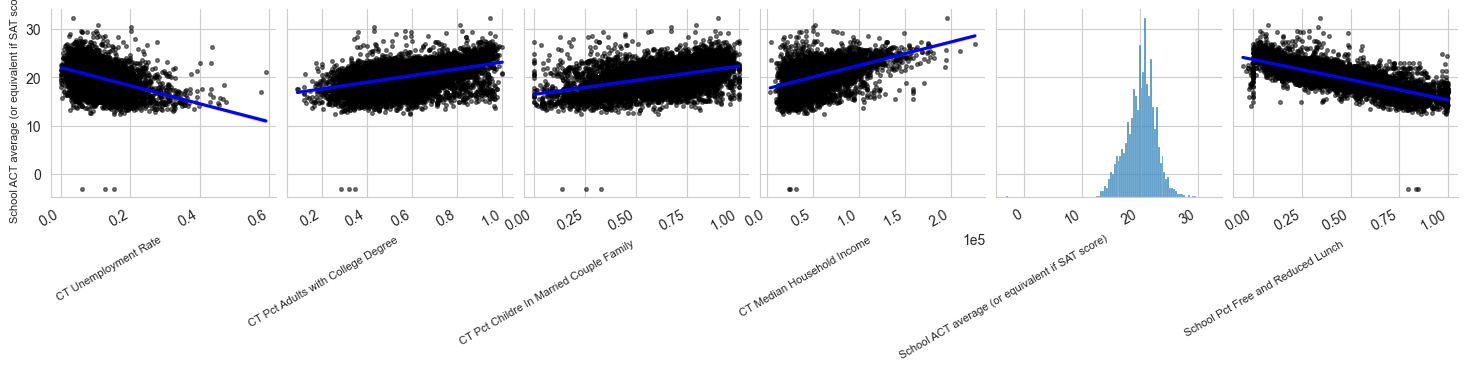

In [718]:
fig = sns.pairplot(
  edgap.drop(columns="NCESSCH School ID"),
  y_vars=['School ACT average (or equivalent if SAT score)'],
  kind="reg",
  plot_kws={
    "line_kws": {"color": "blue"},
    "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
  }
)

for ax in fig.axes.flat:
  if ax.get_xlabel() == 'CT Median Household Income':
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # Apply scientific notation
  ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right') # X-axis label size and rotation
  ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size
  
  # Rotate x-axis tick labels
  plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
  
plt.show()

From the steps above, we know that:
1. There appears to be a relationship between the socioeconomic variables and the ACT score
2. There are some out-of-range ACT and percent lunch values that will need to be dealt with
3. We should have confidence that it is worthwhile to spend time preparing the data for analysis.

## Data Preparation

#### Select relevent subsets of data

The school information data set contains many columns. We only need the year, school identity, location, and school type information.

Keep the columns SCHOOL_YEAR, NCESSCH, LSTATE, LZIP, SCH_TYPE_TEXT, LEVEL

In [719]:
school_information = school_information[
  ['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT']
]

In [720]:
school_information.head()

,SCHOOL_YEAR,NCESSCH,LSTATE,LZIP,SCH_TYPE_TEXT,LEVEL,CHARTER_TEXT
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


#### Rename columns

We will rename the columns to follow best practices of style and being informative. We will do it before joining data sets to make it obvious that the key has the same name in each data set.

In [721]:
edgap = edgap.rename(
  columns={
    "NCESSCH School ID": "id",
    "CT Unemployment Rate": "rate_unemployment",
    "CT Pct Adults with College Degree": "percent_college",
    "CT Pct Childre In Married Couple Family": "percent_married",
    "CT Median Household Income": "median_income",
    "School ACT average (or equivalent if SAT score)": "average_act",
    "School Pct Free and Reduced Lunch": "percent_lunch",
  }
)

Rename the columns SCHOOL_YEAR, NCESSCH, LSTATE, LZIP, SCH_TYPE_TEXT, LEVEL to year, id, state, zip_code, school_type, and schoo_level

In [722]:
school_information = school_information.rename(
  columns={
    'SCHOOL_YEAR': 'year', 
    'NCESSCH': 'id', 
    'LSTATE': 'state', 
    'LZIP': 'zip_code', 
    'SCH_TYPE_TEXT': 'school_type', 
    'LEVEL': 'school_level',
    'CHARTER_TEXT': 'charter'
  }
)

In [723]:
edgap.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [724]:
school_information.head()

,year,id,state,zip_code,school_type,school_level,charter
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


From steps above we have that:
1. We selected a subset of columns of the school information data set.
2. We renamed the columns for clarity and follow formatting guidelines.
3. We are ready to join the data frames.

#### Join data frames

We want to join the DataFrames using the identity of the school as the key. The identity is given by the NCESSCH school identity.
The value is an `string` in the school information data set after recreated and an `object` in the EdGap dataset.
We will cast the `id` column in the `EdGap` DataFrame as a `string` to be the same data type as the school information data set. We also changed the data type of zip code from `float` to `object`.

In [725]:
school_information['id'] = school_information['id'].astype('object')

In [726]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102183 non-null  object
 1   id            102181 non-null  object
 2   state         102183 non-null  object
 3   zip_code      102183 non-null  object
 4   school_type   102181 non-null  object
 5   school_level  102179 non-null  object
 6   charter       102179 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB


Join the data frames and call the result df

In [727]:
df = edgap.merge(
  school_information,
  how='left',
  on='id'
)

In [728]:
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level,charter
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No


In [729]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               7898 non-null   object 
 8   state              7898 non-null   object 
 9   zip_code           7898 non-null   object 
 10  school_type        7898 non-null   object 
 11  school_level       7898 non-null   object 
 12  charter            7898 non-null   object 
dtypes: float64(6), object(7)
memory usage: 811.2+ KB


Now that we have a merged data frame that contain all information for analysis.

#### Quality Control

There are natural bounds for the numerical variables in the data set. Check the minimum and maximum values in each column.

In [730]:
df.describe()

,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
count,7972.000000,7973.000000,7961.000000,7966.000000,7986.000000,7986.000000
mean,0.098730,0.568930,0.633440,52026.905222,20.181532,0.420651
std,0.058959,0.165704,0.196764,24228.057079,2.595201,0.239754
min,0.000000,0.091493,0.000000,3589.000000,-3.070818,-0.054545
25%,0.058655,0.450828,0.523810,36597.250000,18.600000,0.238501
50%,0.085649,0.554979,0.667594,46833.500000,20.400000,0.381570
75%,0.123376,0.676571,0.777135,61369.250000,21.910867,0.575447
max,0.590278,1.000000,1.000000,226181.000000,32.362637,0.998729


From the information above, we know that the average_act and percent_lunch contain incorrect value as we know from the min value that contain negative value. Next, we need to set out-of-range values to NaN using Numpy library

In [731]:
df.loc[df['average_act'] < 1, 'average_act'] = np.nan

In [732]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan

We don't want to remove the entire row of incorrect value because we still want the other information so now they contain the NaN. Next we will check the school type and school level.

In [733]:
df['school_type'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

In [734]:
df['school_level'].value_counts()

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

In [735]:
df['charter'].value_counts()

charter
No                7329
Yes                352
Not applicable     217
Name: count, dtype: int64

Since the ACT is for high school, so we keep only the high schools for analysis

In [736]:
df = df.loc[df['school_level'] == 'High']

Next, we need to check for any duplicated rows to prevent any incorrect value

In [737]:
df.duplicated().sum()

np.int64(0)

#### Identify missing values

Let's check how many values of each variable are missing value

In [738]:
df.isna().sum().to_frame(name="Number of Missing Values")

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,3
percent_lunch,20
year,0
state,0
zip_code,0


From the frame above, we can see that we only missing values from the EdGap data set and the school information data set contain all value. Let's convert the number above to percentage of values of each variable

In [739]:
percent_missing = df.isna().mean().round(4) * 100

percent_missing.to_frame(name="Percent Missing Values")

,Percent Missing Values
id,0.00
rate_unemployment,0.17
percent_college,0.15
percent_married,0.28
median_income,0.22
average_act,0.04
percent_lunch,0.28
year,0.00
state,0.00
zip_code,0.00


From the frame above, we can see that the percent missing value are really low, but lets check how many states that we collect data

In [740]:
df['state'].nunique()

20

So we know that the data only collected from 20 states due to omission. This is not evident by examining NaN values in the data set. As we focus in ACT and its percent of missing value is really low, so we drop the rows where the ACT score is missing

In [741]:
df = df.dropna(subset=['average_act'])

In [742]:
df.isna().sum().to_frame(name="Number of Missing Values")

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,0
percent_lunch,20
year,0
state,0
zip_code,0


Now that we have all the rows that contain all non-null values. If we drop rows that have NaNs for any socioeconomic variables, then we will negatively affect our analysis using the variableswhere data were present. So, we will not drop the rows in this data set that are missing the socioeconimic variables. We will impute the missing values.

#### Data Imputation

Define the predictor variables to be `rate_unemployment`, `percent_college`, `percent_married`, `median_income`, `percent_lunch`, and `state`.

In [743]:
predictor_variables = [
  'rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch', 'state', 'charter'
]

Use the iterative imputer to replace missing values in the columns corresponding to predictor variables in the analysis.

In [744]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [745]:
imputer = IterativeImputer()

Fit the imputer using the numerical predictor variables (this can include dummies for categorical variables). Define the columns to use in the imputation process.

In [746]:
numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()
print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


Let's fit the imputer from those numerical predictors

In [747]:
imputer.fit(df.loc[:, numerical_predictors])

,estimator,None
,missing_values,nan
,sample_posterior,False
,max_iter,10
,tol,0.001
,n_nearest_features,None
,initial_strategy,'mean'
,fill_value,None
,imputation_order,'ascending'
,skip_complete,False
,min_value,-inf


Now we have learn the relations between those columns and then we can apply the transform method to actually replace the missing values

In [748]:
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

Next we can check for missing values to make sure non-null values in the data set

In [749]:
df.isna().sum().to_frame(name="Number of Missing Values")

,Number of Missing Values
id,0
rate_unemployment,0
percent_college,0
percent_married,0
median_income,0
average_act,0
percent_lunch,0
year,0
state,0
zip_code,0


Now we have cleaned data set and ready for analysis and saved the clean data frame as a csv file

In [750]:
df.to_csv(
  '../data/education_clean.csv',
  encoding='utf-8-sig',
  index=False
)

The cleaned data set save to in `../data/education_clean.csv`

## Exploratory data analysis

Plot the correlation matrix of the numerical variables in the training data to explore relationships between the variables.

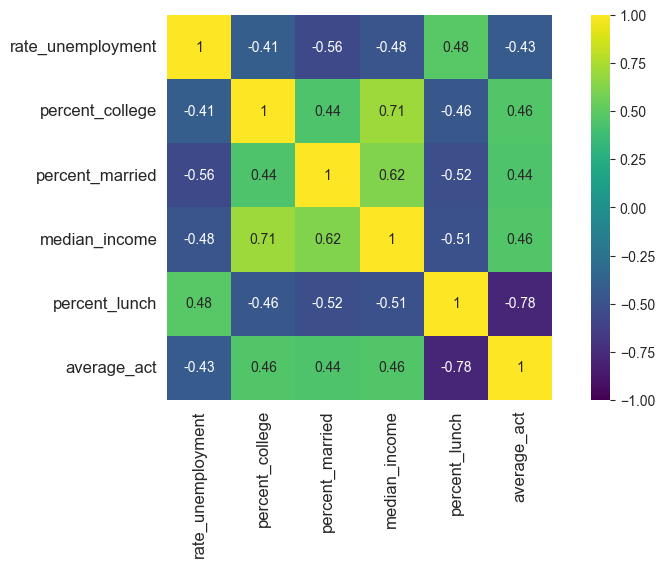

In [751]:
predictor_variables = [
  'rate_unemployment', 
  'percent_college', 
  'percent_married', 
  'median_income', 
  'percent_lunch'
]

numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = df[numerical_predictors + ["average_act"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
  corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

We can see that all of the socioeconomic predictor variables have non neligible correlation coefficient with the average ACT. In fact, the correlation between percent lunch and average ACT is -0.78, which is quite large in magnitude. Next, let's make pair plots to explore relationships between the variables

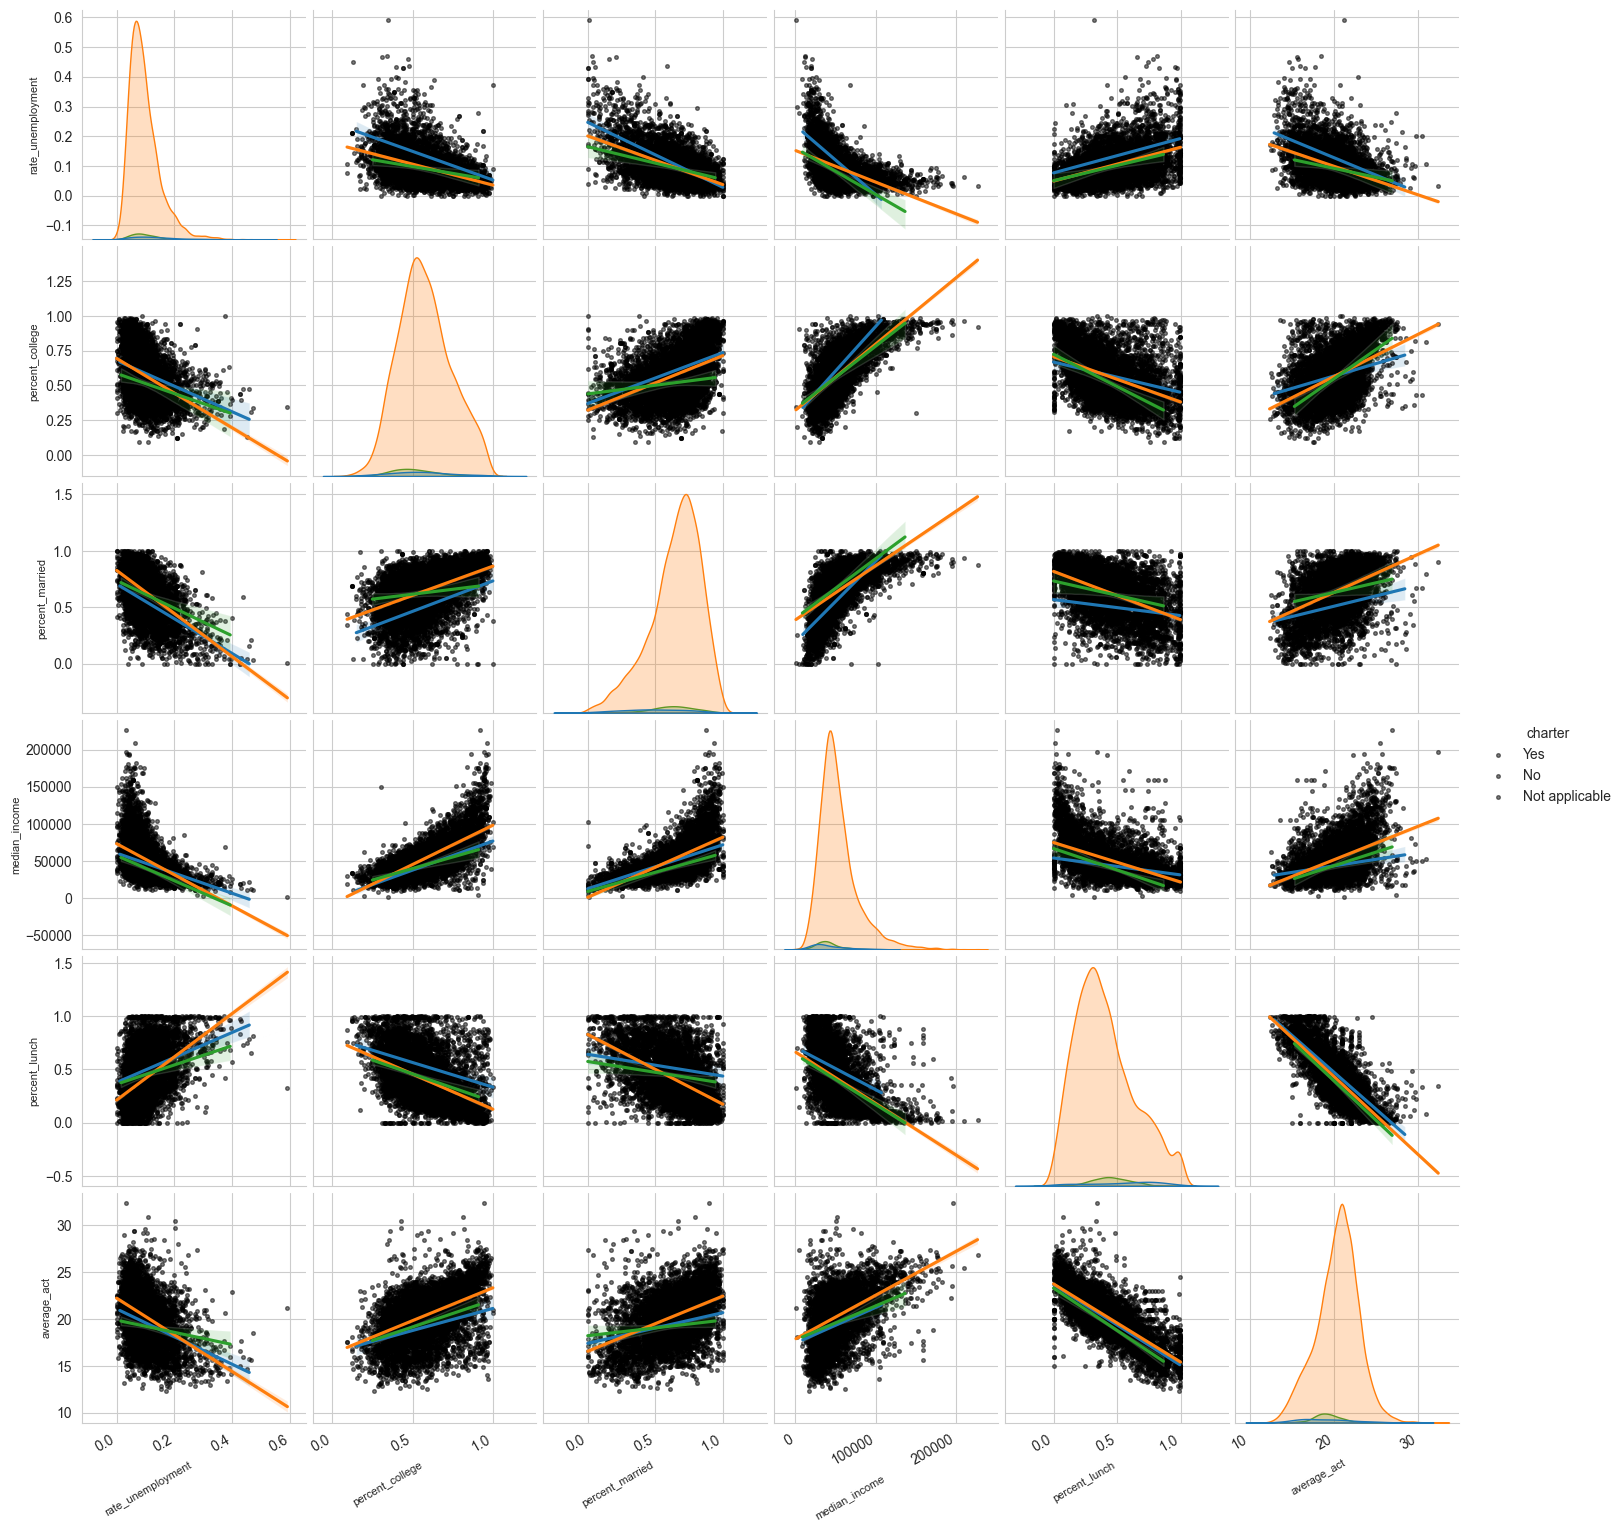

In [752]:
fig = sns.pairplot(
  data=df,
  vars=numerical_predictors + ['average_act'],
  hue='charter',
  kind='reg',
  plot_kws={"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},},
)

for ax in fig.axes.flat:
  if ax.get_xlabel() == 'CT Median Household Income':
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # Apply scientific notation
  ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right') # X-axis label size and rotation
  ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size
  
  # Rotate x-axis tick labels
  plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
  
plt.show()

as we can see in the bottom row of the pair plot, we note that the relationships are quite similar between the different values of whether a school is a charter school or not. Another thing to note is t look at what is the form of the relationship between each of these socioeconomic variables and the average ACT score.

#### Identify ourliers

We can use the interquartile range to identify ourliers. This is also evident in boxplots of the data. Median income is on a very different scale than the other predictors, so we will make two plots to explore the data.

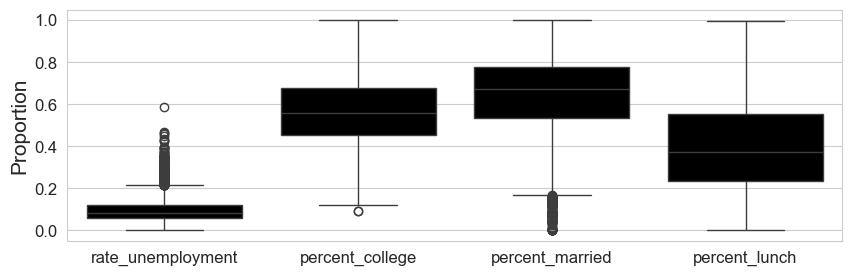

In [753]:
plt.figure(figsize=(10,3))

fractions = list(numerical_predictors)
fractions.remove('median_income')

sns.boxplot(data=df[fractions], color='k')

plt.ylabel('Proportion', fontsize=15)
plt.tick_params(labelsize=12)

plt.show()

This boxplot does show us that the unemployment rate, percent college, and percent married do have outliers. However the vlaues do not seem so far away from the majority of the data, nor do they seem like they are incorrect values so much that we would want to necessarily exclude them from our analysis.

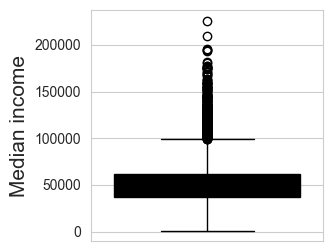

In [754]:
plt.figure(figsize=(3,3))

sns.boxplot(data=df, y='median_income', color='k')

plt.ylabel('Median income', fontsize=15)

plt.show()

This boxplot of median income also has outliers, which typical of income distributions, these values while being technically ourliers, do not look as they are necessarily incorrect. But we should be mindful that these outliers are present in the data.

## Modeling

### Single input models

Fit and assess models presicting the average ACT score from each of the input variables. We might try polynomial linear regression models, as appropriate

#### Median imcome

Plot the regression line and the scatter plot

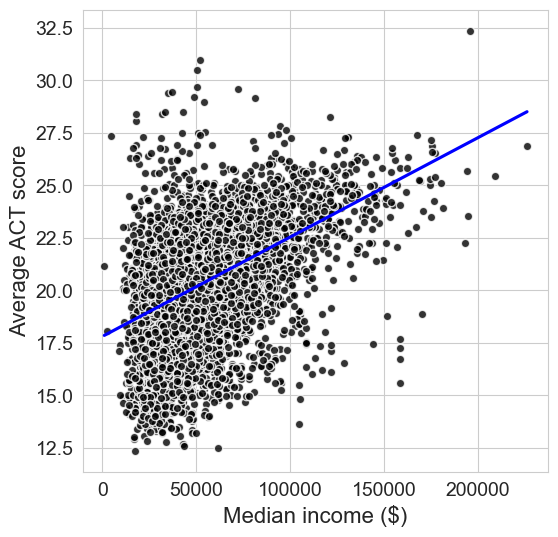

In [755]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x='median_income',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1}
            )

plt.xlabel('Median income ($)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

There is a relationship between the median income and the average ACT score, and it appears that this simple linear regression is providing only moderate fit of the data. Let's actually fit the model and then we will asses it using graphical and numerical methods

In [756]:
model_median_income = smf.ols(formula='average_act ~ median_income', data=df).fit()
print(model_median_income.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     1934.
Date:                Tue, 14 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:40:40   Log-Likelihood:                -16043.
No. Observations:                7227   AIC:                         3.209e+04
Df Residuals:                    7225   BIC:                         3.210e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.8026      0.063    284.794

This assessment tells us that the intercept in the model is 17.8 and the coefficient on median income is 4.732e-05. It is a very small coefficient because the median income is calculated in dollars and go over a large range, whereas the ACT score is over a much smaller range. We also interested in the statistical significance of the coefficient particularly the one on our predictor, and we can look in the column for the P values to see that they are small and zero up to three decimal places, so we have statistically significant coefficients. Let's compute the R-squared.

In [757]:
model_median_income.rsquared

np.float64(0.21118648979300614)

Compute the RMSE

In [758]:
y_hat = model_median_income.predict()

In [759]:
np.sqrt(mean_squared_error(df['average_act'], y_hat)).round(3)

np.float64(2.228)

Compute the mean absolute error

In [760]:
mean_absolute_error(df['average_act'], y_hat)

1.7129386980688617

From the computation above, the model was not perfect, as we saw, that is a relatively small error in terms of the range of possible values for an ACT score. So it is saying that we are able to in some way predict the ACT score from this particular input variable. We would also like to asses the model using a graphical method and standard approach is to use a residual plot.

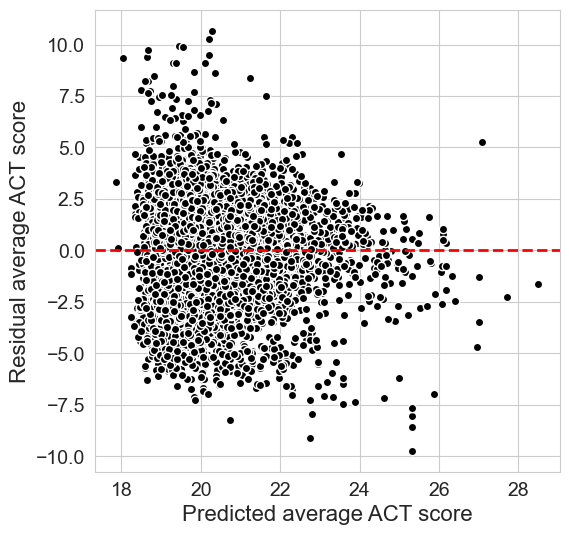

In [761]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat, model_median_income.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

This plot is not purely a cloud of points, the error between what the actual value is and the prediction, that would suggest to use that an alternative model might give us an improvement over the model. So we might try a more complicated model and we could consider a quadratic polynomial regression model. Plot the regression curves and the scatter plot.

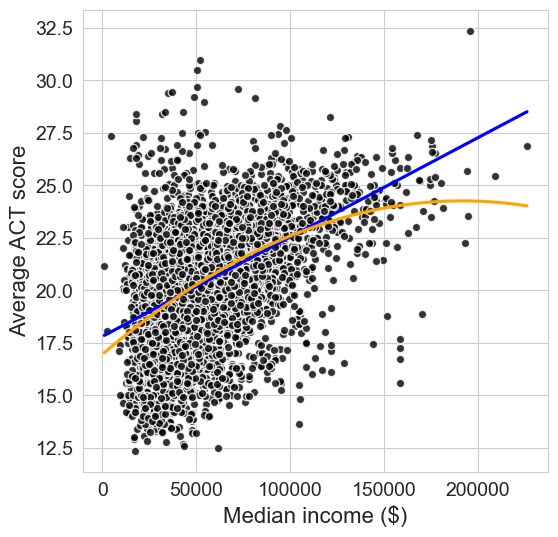

In [762]:
plt.figure(figsize=(6, 6))

sns.regplot(data=df,
            x='median_income',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1}
            )

sns.regplot(data=df,
            x='median_income',
            y='average_act',
            order=2,
            color='orange',
            ci=False,
            scatter=False
            )

plt.xlabel("Median income ($)", fontsize=16)
plt.ylabel("Average ACT score", fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

The qudratic model might provide a slightly better fit, but it is not clear that it is going to be significantly better than the simple linear regression. But we should fit the model and then consider the accuracy and the significance of the quadratic model.

In [763]:
model_median_income2 = smf.ols( # type: ignore
  formula='average_act ~ median_income + I(median_income**2)',
  data=df
).fit()

In [764]:
print(model_median_income2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     1013.
Date:                Tue, 14 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:40:40   Log-Likelihood:                -16007.
No. Observations:                7227   AIC:                         3.202e+04
Df Residuals:                    7224   BIC:                         3.204e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                16.94

The summary shows that the R-squared is 0.219, and it is very slightly higher than the previous model. The coefficient on the squared term is statistically significant. It is not clear how much that is improving the model. So we have seen from this analysis that we do have a significant quadratic term as well as a significant linear term.

In [765]:
model_median_income2.pvalues

Intercept                0.000000e+00
median_income            2.631899e-99
I(median_income ** 2)    1.395848e-17
dtype: float64

We can use an analysis of variance or ANOVA to compare these two nested plynomial linear regression models where we are comparing the simpler model to the more complicated model and statist significant in terms of its difference from the simpler model.

In [766]:
sms.anova_lm(model_median_income, model_median_income2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,7225.0,35865.012794,0.0,NaN,NaN,NaN
1,7224.0,35505.105960,1.0,359.906834,73.227974,1.395848e-17


The P value being quite small and indicating that there is a statistically significant difference. The P value is in fact exactly the same as the P value on the coefficient for the squared term. Let's look at the accuracy of the quadratic model and we will use the mean absolute error.

In [767]:
mean_absolute_error(df['average_act'], model_median_income2.predict())

1.6972389257968241

In [768]:
mean_absolute_error(df['average_act'], model_median_income.predict())

1.7129386980688617

The mean absolute error is 1.69, which if we compare this to the first model is smaller but not practically smaller. So this shows us that we have the ability to look at a relationship between one of our socioeconomic predictor variables and the average ACT score and formulate a model that provides some predictive power of what the ACT score acutally is, but it is a relatively weak prediction. We've also seen that a linear model is probably going to be sufficient to predict the ACT score and that considering something like a quadratic is not necessary going to provide a much better fit.

#### Rate Unemployment

Plot the regression line and the scatter plot

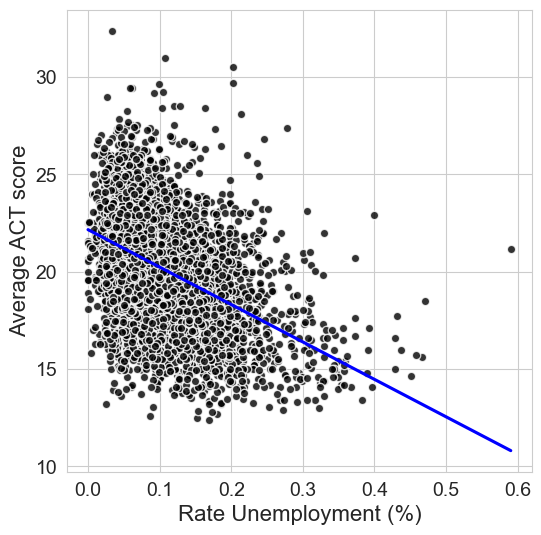

In [769]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x='rate_unemployment',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1}
            )

plt.xlabel('Rate Unemployment (%)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

There is a relationship between the rate unemployment and the average ACT score, and it appears that this simple linear regression is providing only moderate fit of the data. Let's actually fit the model and then we will asses it using graphical and numerical methods

In [777]:
model_rate_unemployment = smf.ols(formula='average_act ~ rate_unemployment', data=df).fit()
print(model_rate_unemployment.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1669.
Date:                Tue, 14 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:45:01   Log-Likelihood:                -16149.
No. Observations:                7227   AIC:                         3.230e+04
Df Residuals:                    7225   BIC:                         3.232e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.1512      0.05

This assessment tells us that the intercept in the model is 22.15 and the coefficient on median income is -19.21. We also interested in the statistical significance of the coefficient particularly the one on our predictor, and we can look in the column for the P values to see that they are small and zero up to three decimal places, so we have statistically significant coefficients. Let's compute the R-squared.

Compute the RMSE

In [778]:
y_hat_unemployment = model_rate_unemployment.predict()

In [779]:
np.sqrt(mean_squared_error(df['average_act'], y_hat_unemployment)).round(3)

np.float64(2.261)

From the computation above, the model was not perfect, as we saw, that is a relatively small error in terms of the range of possible values for an ACT score. If we compare this with the median income model, which has RSME is about 1.713, that the median income model is better predictor of ACT score than unemployment rate. We would also like to asses the model using a graphical method and standard approach is to use a residual plot.

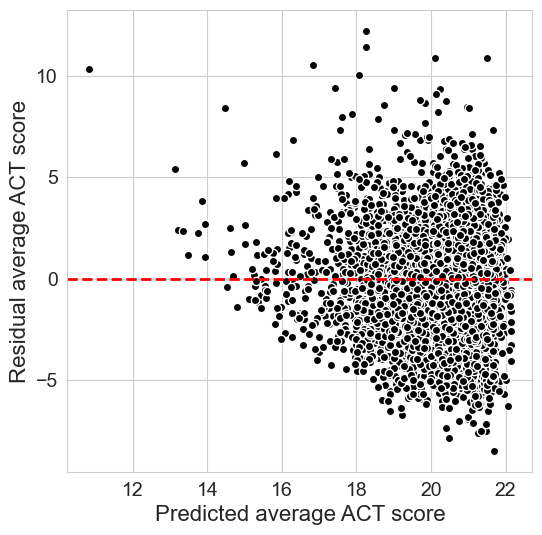

In [780]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat_unemployment, model_rate_unemployment.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

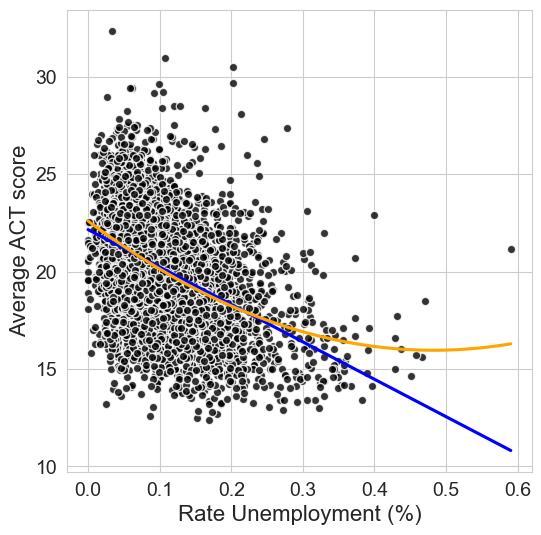

In [776]:
plt.figure(figsize=(6, 6))

sns.regplot(data=df,
            x='rate_unemployment',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1}
            )

sns.regplot(data=df,
            x='rate_unemployment',
            y='average_act',
            order=2,
            color='orange',
            ci=False,
            scatter=False
            )

plt.xlabel("Rate Unemployment (%)", fontsize=16)
plt.ylabel("Average ACT score", fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

In [781]:
model_rate_unemployment2 = smf.ols( # type: ignore
  formula='average_act ~ rate_unemployment + I(rate_unemployment**2)',
  data=df
).fit()

In [782]:
print(model_rate_unemployment2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     865.0
Date:                Tue, 14 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:45:48   Log-Likelihood:                -16125.
No. Observations:                7227   AIC:                         3.226e+04
Df Residuals:                    7224   BIC:                         3.228e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

The summary shows that the R-squared is 0.193, and it is very slightly higher than the previous model. The coefficient on the squared term is statistically significant. It is not clear how much that is improving the model. So we have seen from this analysis that we do have a significant quadratic term as well as a significant linear term.

In [783]:
model_rate_unemployment2.pvalues

Intercept                     0.000000e+00
rate_unemployment            9.628233e-101
I(rate_unemployment ** 2)     2.360918e-12
dtype: float64

In [785]:
sms.anova_lm(model_rate_unemployment, model_rate_unemployment2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,7225.0,36932.894308,0.0,NaN,NaN,NaN
1,7224.0,36682.406013,1.0,250.488295,49.329574,2.360918e-12


In [786]:
mean_absolute_error(df['average_act'], model_rate_unemployment2.predict())

1.7381981457701847

In [787]:
mean_absolute_error(df['average_act'], model_rate_unemployment.predict())

1.7421893796735084

The quadratic model techinically improve the model fit better but the improvement is tiny, from 0.188 to 0.193. The P value being quite small and indicating that there is a statistically significant difference. The P value is in fact exactly the same as the P value on the coefficient for the squared term. The mean absolute error is a little better than first model but not practically bigger. Therefore, the linear model is sufficient to predict ACT score and quadratic is not necessary.

#### Percent College

Plot the regression line and the scatter plot

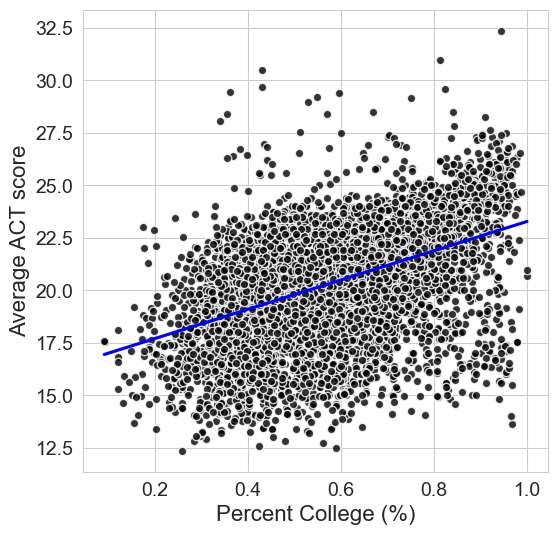

In [788]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x='percent_college',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1}
            )

plt.xlabel('Percent College (%)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

There is a relationship between the rate unemployment and the average ACT score, and it appears that this simple linear regression is providing only moderate fit of the data. Let's actually fit the model and then we will asses it using graphical and numerical methods

In [791]:
model_percent_college = smf.ols(formula='average_act ~ percent_college', data=df).fit()
print(model_percent_college.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     1922.
Date:                Wed, 15 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:09:14   Log-Likelihood:                -16048.
No. Observations:                7227   AIC:                         3.210e+04
Df Residuals:                    7225   BIC:                         3.211e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.3039      0.095    1

This assessment tells us that the intercept when the percent college at 0 is 16.304, and when the percent of college increase 0.01 then the average ACT score increase by about 0.0697. The R-squared show that about 21% of variation in ACT score can be explain by percent_college. The p-value also show that they are really small and zero up to three decimal places.

Compute the RMSE

In [792]:
y_hat_percent_college = model_percent_college.predict()

In [793]:
np.sqrt(mean_squared_error(df['average_act'], y_hat_percent_college)).round(3)

np.float64(2.229)

Compute the mean absolute error

In [794]:
mean_absolute_error(df['average_act'], y_hat_percent_college)

1.7169024235889725

From the computation above, the model was not perfect, as we saw, that is a relatively small error in terms of the range of possible values for an ACT score. So it is saying that we are able to in some way predict the ACT score from this particular input variable. We would also like to asses the model using a graphical method and standard approach is to use a residual plot.

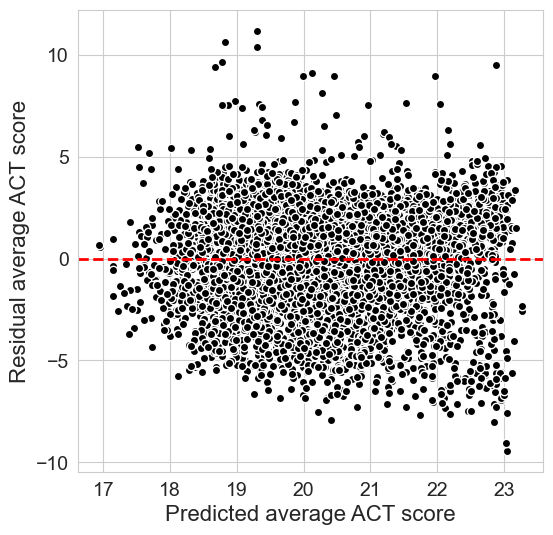

In [795]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat_percent_college, model_percent_college.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

This plot is a cloud of point and look randomly scattered around zero. It looks like the area with more college adults tend to have higher average ACT score, and the linear relationship describe the trend well. Therefore, the linear regression model is sufficient to predict the ACT score.

#### Percent Married

Plot the regression line and the scatter plot

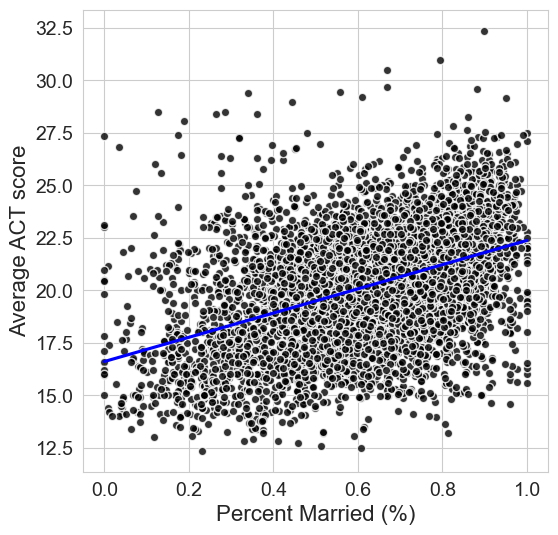

In [804]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x='percent_married',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1}
            )

plt.xlabel('Percent Married (%)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

There is a relationship between the adult live in a married family and the average ACT score, and it appears that this simple linear regression is providing only moderate fit of the data. Let's actually fit the model and then we will asses it using graphical and numerical methods

In [798]:
model_percent_married = smf.ols(formula='average_act ~ percent_married', data=df).fit()
print(model_percent_married.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     1733.
Date:                Wed, 15 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:30:03   Log-Likelihood:                -16124.
No. Observations:                7227   AIC:                         3.225e+04
Df Residuals:                    7225   BIC:                         3.227e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.6046      0.093    1

This assessment tells us that the intercept when the percent college at 0 is 16.604, and when the percent of live in married family increase 0.01 then the average ACT score increase by about 0.058. The R-squared show that about 19% of variation in ACT score can be explain by percent_college. The p-value also show that they are really small and zero up to three decimal places.

Compute the RMSE

In [799]:
y_hat_percent_married = model_percent_married.predict()

In [800]:
np.sqrt(mean_squared_error(df['average_act'], y_hat_percent_married)).round(3)

np.float64(2.253)

Compute the mean absolute error

In [801]:
mean_absolute_error(df['average_act'], y_hat_percent_married)

1.7361820917022404

From the computation above, the model was not perfect, as we saw, that is a relatively small error in terms of the range of possible values for an ACT score. So it is saying that we are able to in some way predict the ACT score from this particular input variable. We would also like to asses the model using a graphical method and standard approach is to use a residual plot.

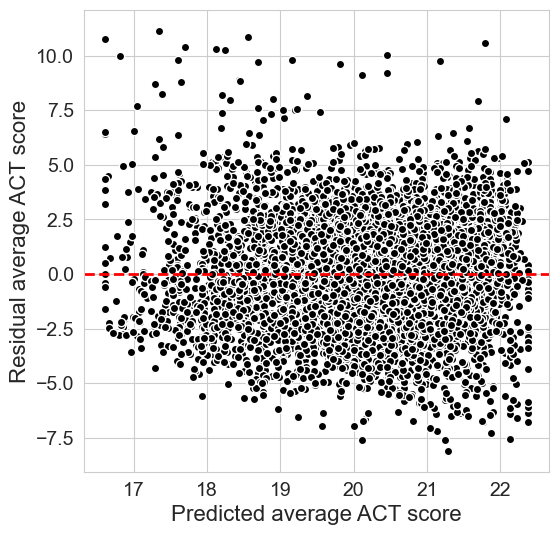

In [802]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat_percent_married, model_percent_married.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

This plot is a cloud of point and look randomly scattered around zero. It looks like the area with more adult live in a married family tend to have higher average ACT score, and the linear relationship describe the trend well. Therefore, the linear regression model is sufficient to predict the ACT score.

#### Percent Lunch

Plot the regression line and the scatter plot

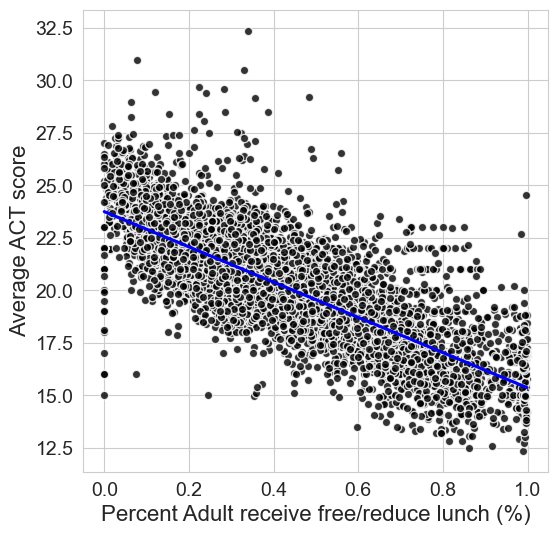

In [803]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x='percent_lunch',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1}
            )

plt.xlabel('Percent Adult receive free/reduce lunch (%)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

There is a relationship between the percent adult receive free/reduce price for lunch and the average ACT score, and it appears that this simple linear regression is providing only moderate fit of the data. Let's actually fit the model and then we will asses it using graphical and numerical methods

In [805]:
model_percent_lunch = smf.ols(formula='average_act ~ percent_lunch', data=df).fit()
print(model_percent_lunch.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                 1.149e+04
Date:                Wed, 15 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:41:56   Log-Likelihood:                -13461.
No. Observations:                7227   AIC:                         2.693e+04
Df Residuals:                    7225   BIC:                         2.694e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.7429      0.037    641.745

This assessment tells us that the intercept when the percent college at 0 is 23.74, and when the percent of adult receive free or reduce price for lunch increase 0.01 then the average ACT score decrease by about 0.084. The R-squared show that about 61% of variation in ACT score can be explain by percent_lunch. The p-value also show that they are really small and zero up to three decimal places.

Compute the RMSE

In [806]:
y_hat_percent_lunch = model_percent_lunch.predict()

In [807]:
np.sqrt(mean_squared_error(df['average_act'], y_hat_percent_lunch)).round(3)

np.float64(1.559)

Compute the mean absolute error

In [808]:
mean_absolute_error(df['average_act'], y_hat_percent_lunch)

1.1689939374388465

From the computation above, the model was not perfect, as we saw, that is a relatively small error in terms of the range of possible values for an ACT score. So it is saying that we are able to in some way predict the ACT score from this particular input variable. We would also like to asses the model using a graphical method and standard approach is to use a residual plot.

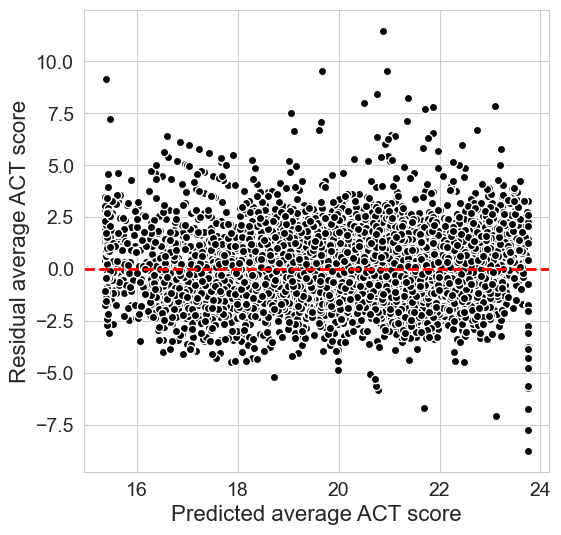

In [810]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat_percent_lunch, model_percent_lunch.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

The model using percent_lunch as a predictor is both statistically strong and practically meaningful. The linear regression captures a clear, negative relationship between socioeconomic disadvantage and ACT performance, explains most of the score variation, and produces unbiased residuals.